## Overview

This is the structure of this file:

0. Packages & Importing
1. Explorative Data Analysis and Data Cleaning
2. Preprocessing
3. Running the Model
4. Plotting the Results
5. Model Diagnostics


ideas:

#do t-SNE
#exclude top 5% and lowest 5 %

## 0. Packages & Importing

In [289]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


# Loading the dataset
filepath = "data_clustering.xlsx"
df = pd.read_excel(filepath)

# make a copy of the original data
original_df = df.copy()



## 1. Explorative Data Analysis and Data Cleaning

Nullvalues of columns:
ID             0
Credit         0
Sex            0
Education      0
Status         0
Age            0
Repayment 6    0
Repayment 5    0
Repayment 4    0
Repayment 3    0
Repayment 2    0
Repayment 1    0
Amount 6       0
Amount 5       0
Amount 4       0
Amount 3       0
Amount 2       0
Amount 1       0
Previous 6     0
Previous 5     0
 Previous 4    0
Previous 3     0
Previous 2     0
Previous 1     0
dtype: int64
Datatypes of columns:
Column 'ID ' has data type: int64
Column 'Credit' has data type: int64
Column 'Sex' has data type: int64
Column 'Education' has data type: int64
Column 'Status' has data type: int64
Column 'Age' has data type: int64
Column 'Repayment 6' has data type: int64
Column 'Repayment 5' has data type: int64
Column 'Repayment 4' has data type: int64
Column 'Repayment 3' has data type: int64
Column 'Repayment 2' has data type: int64
Column 'Repayment 1' has data type: int64
Column 'Amount 6' has data type: int64
Column 'Amount 5' has data 

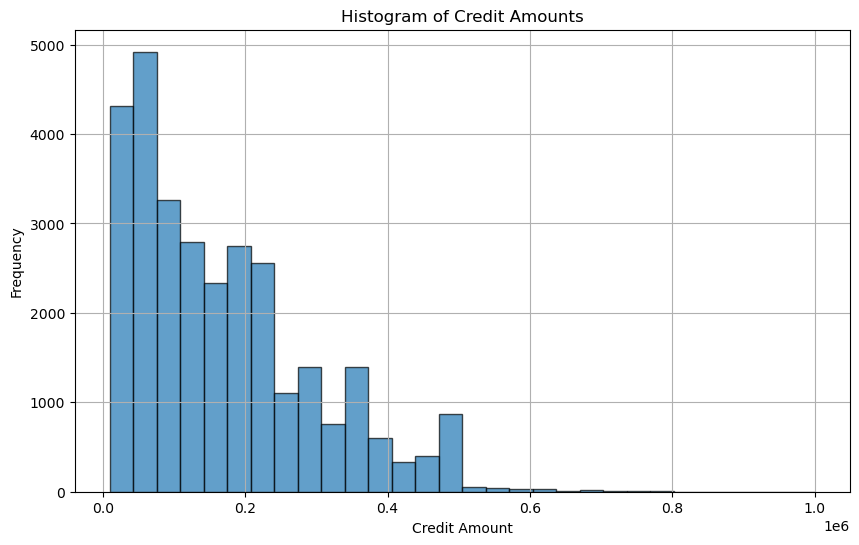

No negative values found in the 'Credit' column.
The 5 highest values in the 'Credit' column are:
2197     1000000
14919     800000
18006     800000
24320     780000
28715     780000
Name: Credit, dtype: int64


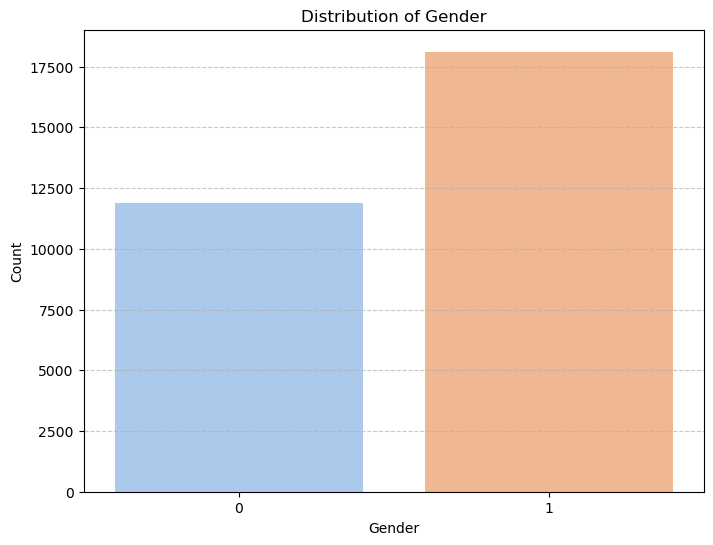

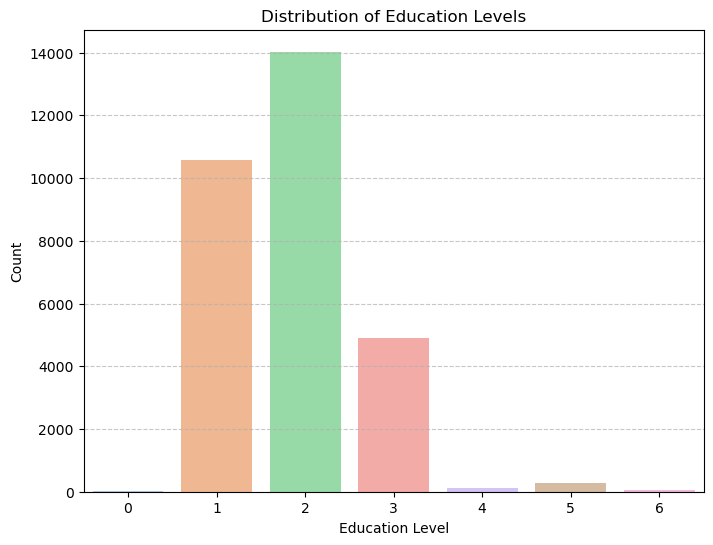

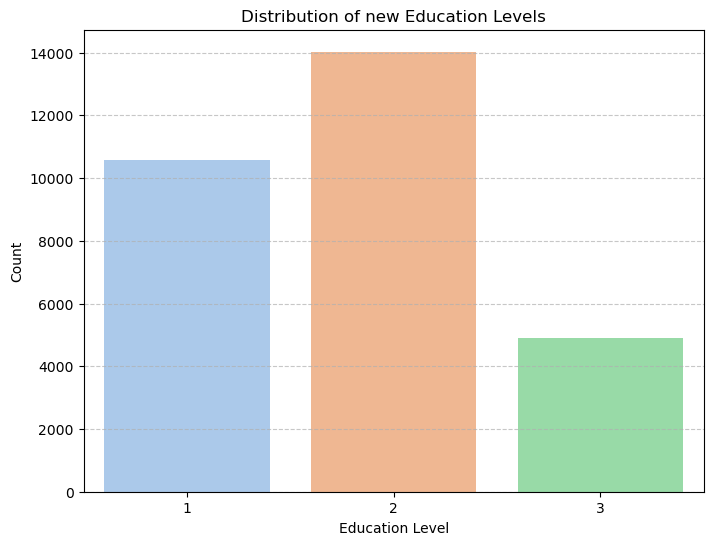

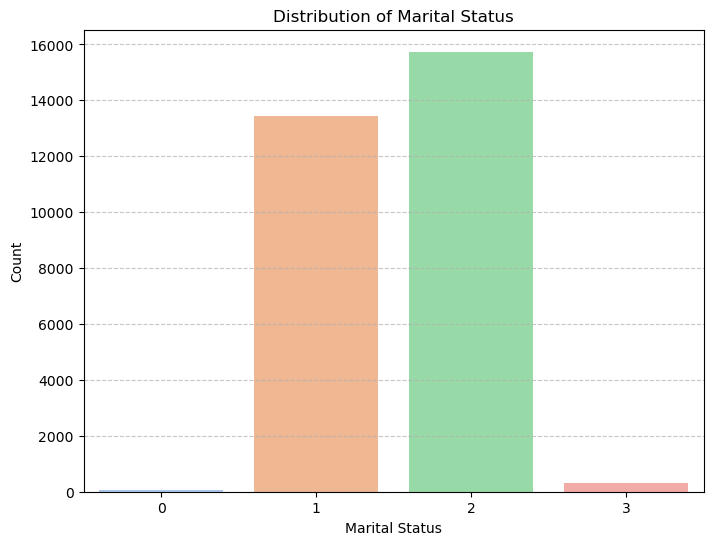

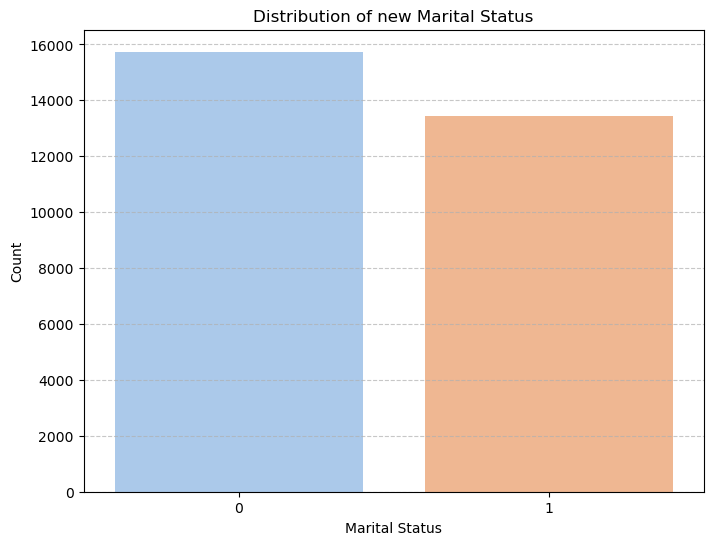

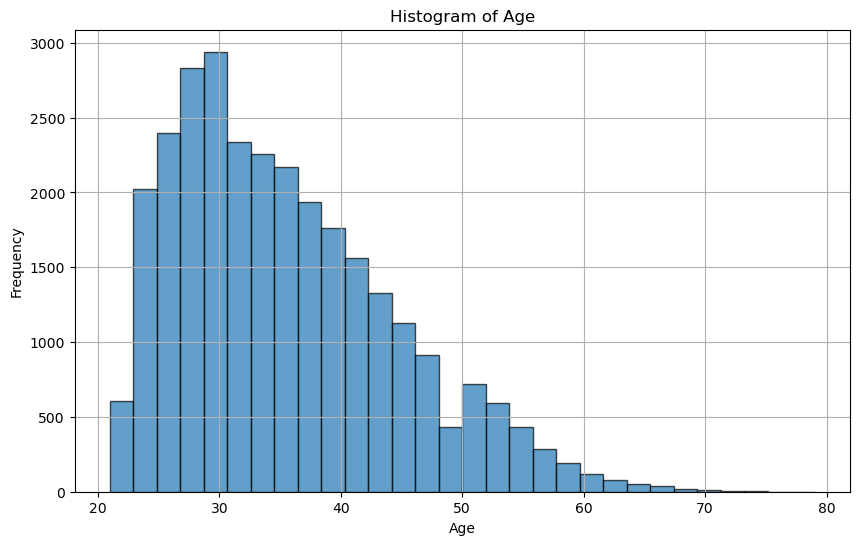

No negative values found in the 'Age' column.
The 5 highest values in the 'Age' column are:
18245    79
246      75
25136    75
25141    75
29175    74
Name: Age, dtype: int64


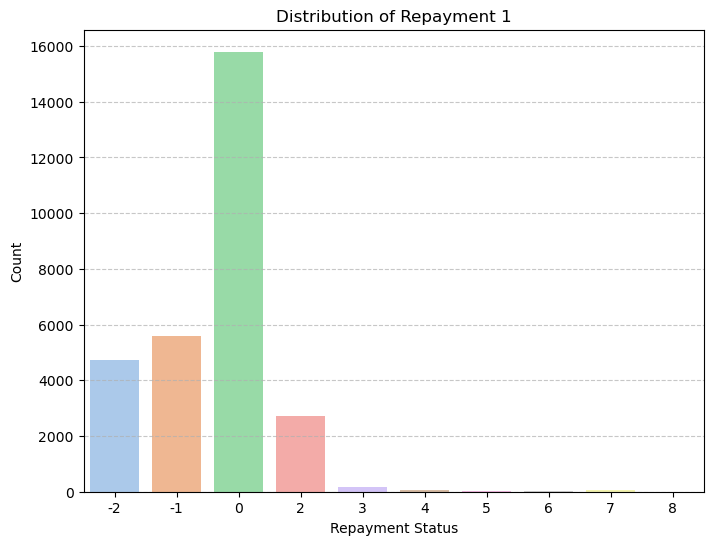

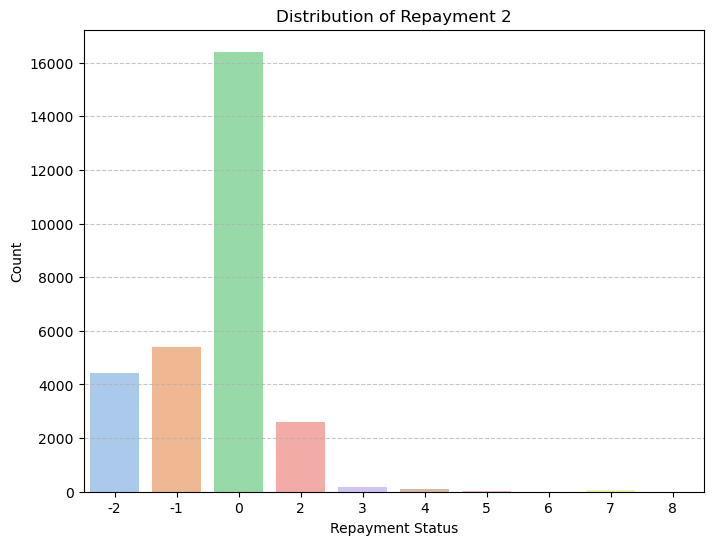

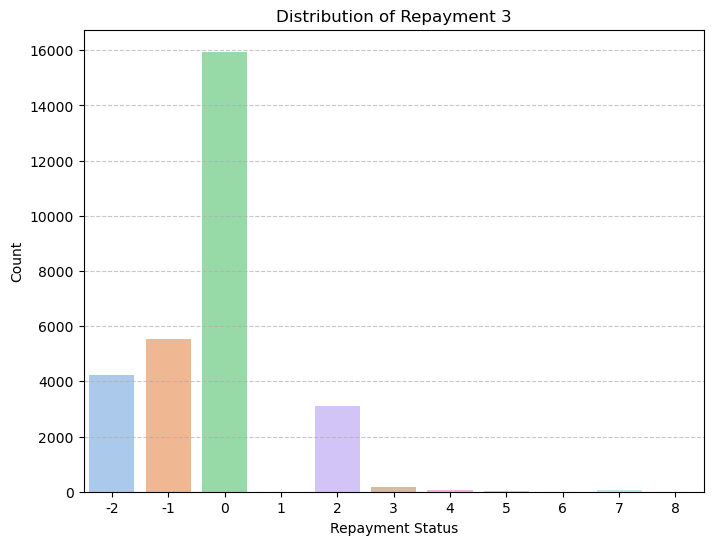

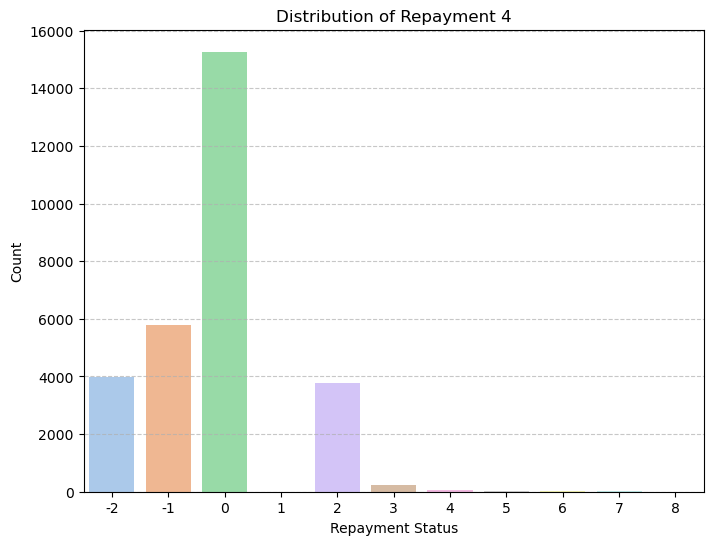

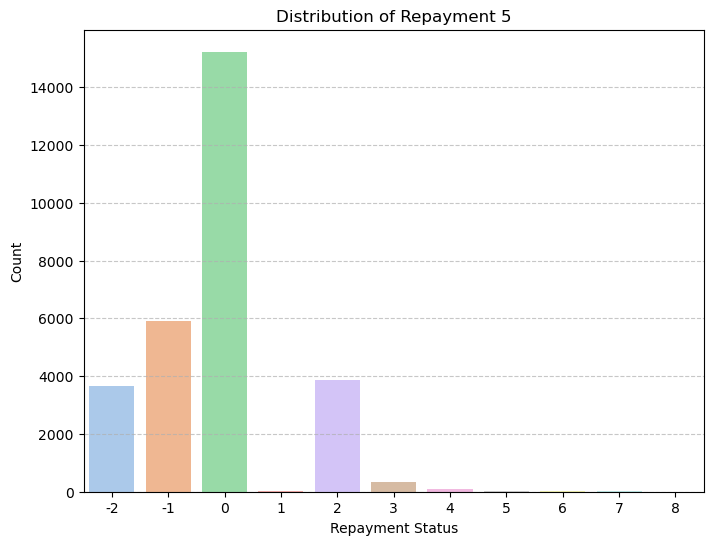

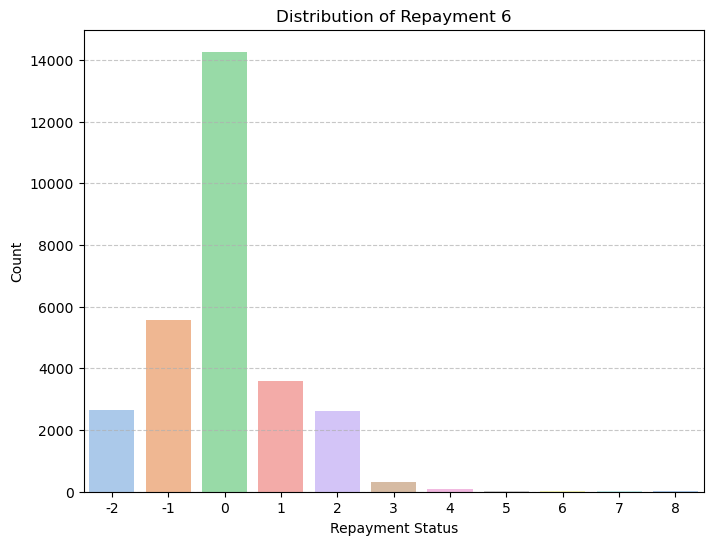

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:132: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


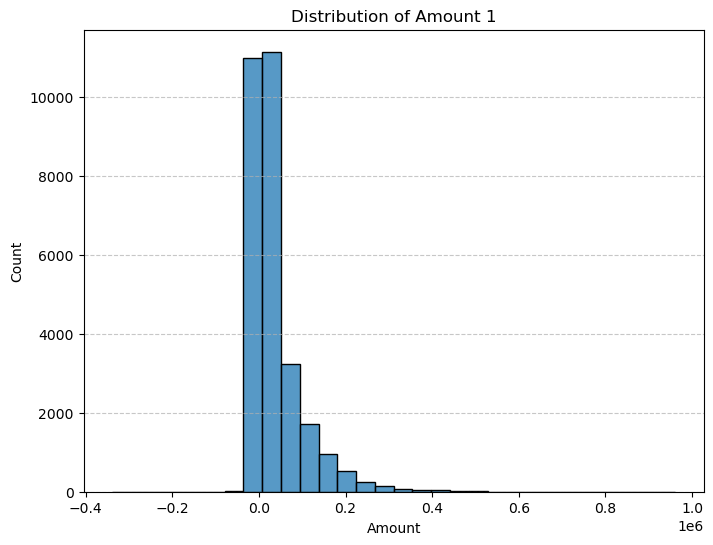

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:132: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


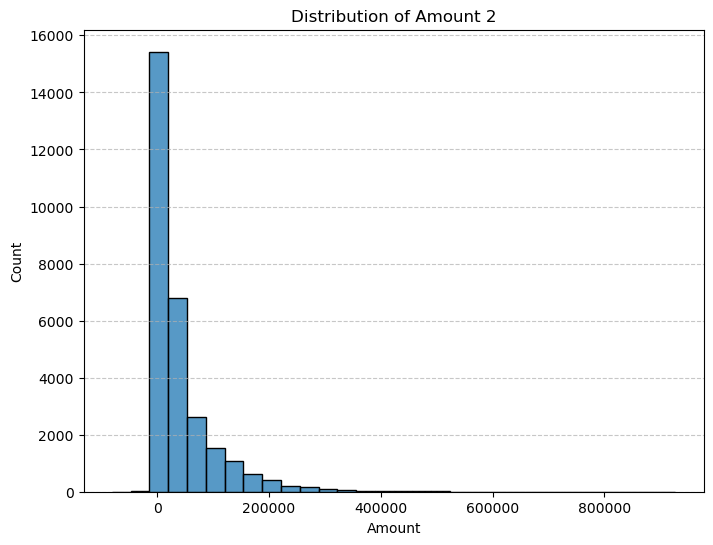

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:132: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


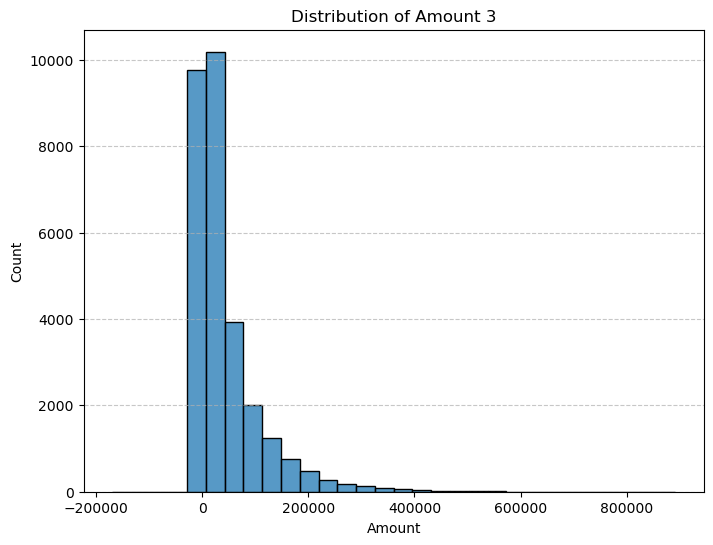

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:132: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


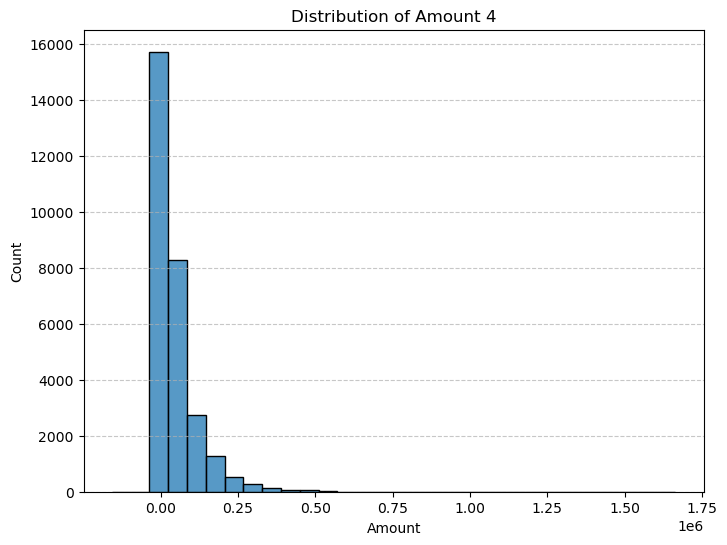

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:132: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


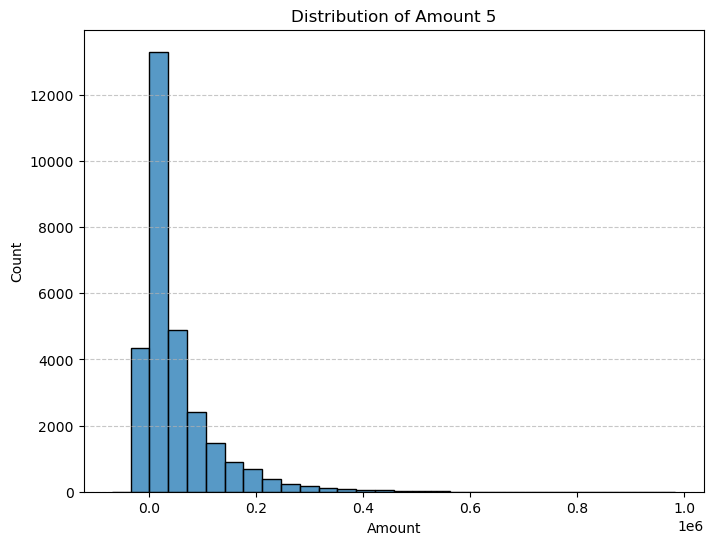

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:132: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


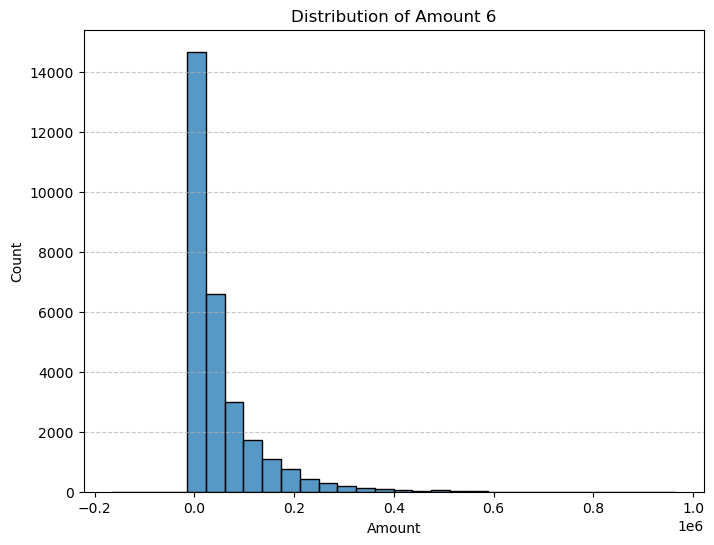

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:144: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


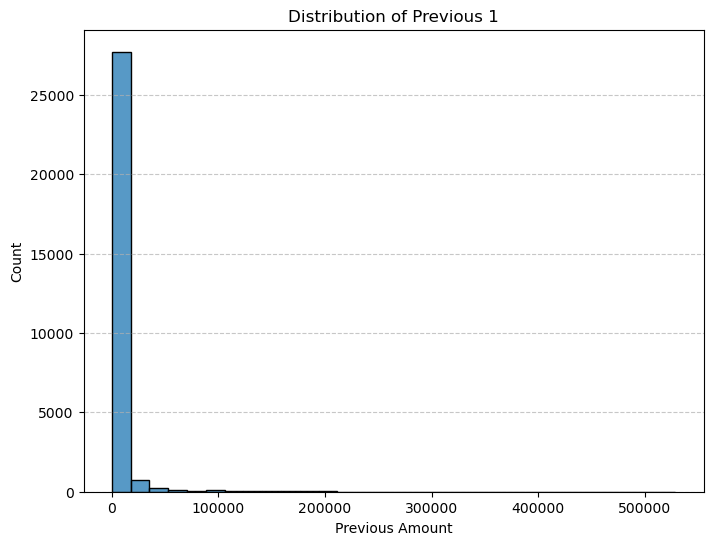

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:144: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


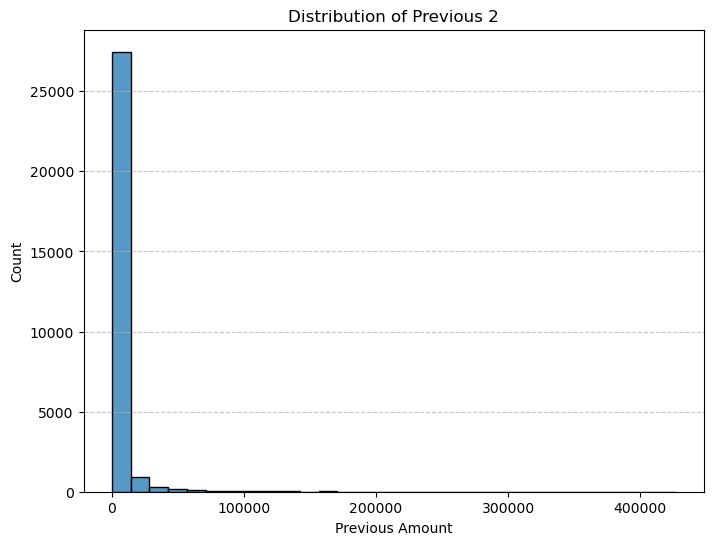

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:144: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


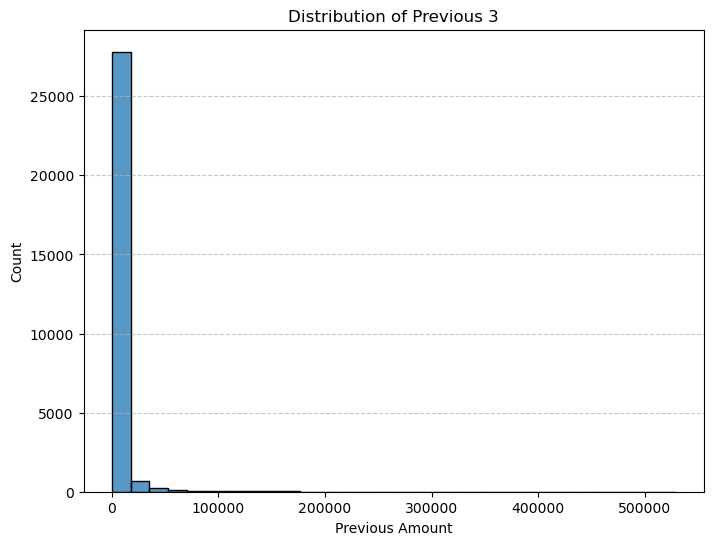

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:144: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


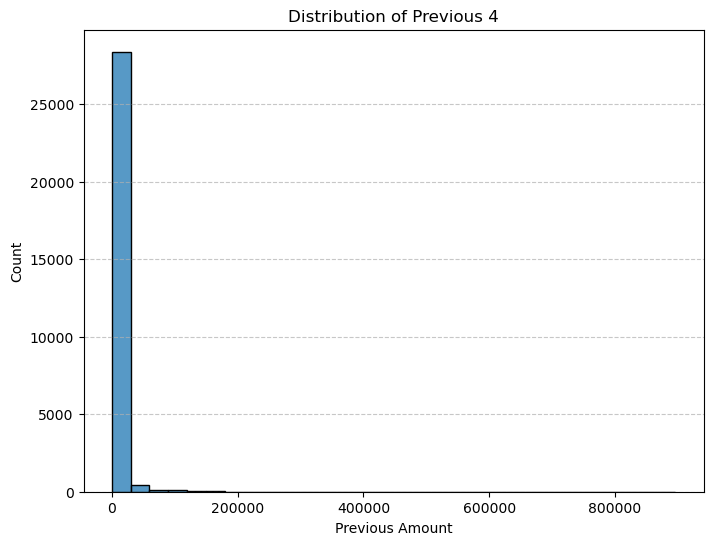

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:144: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


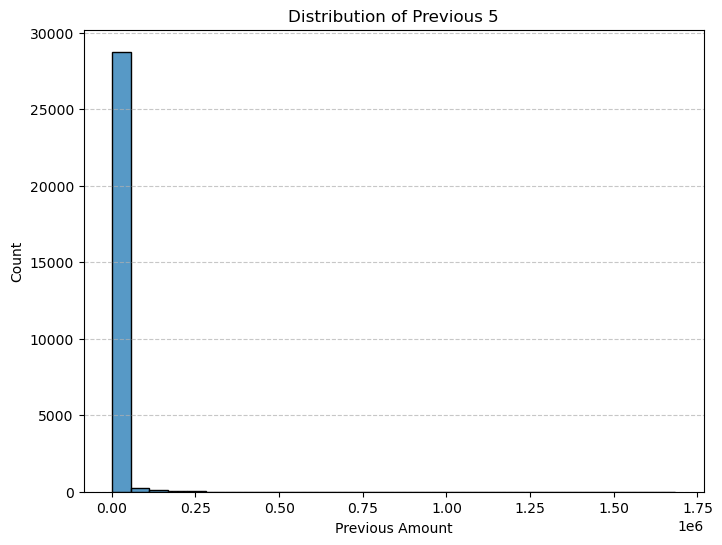

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_2705/3623624556.py:144: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


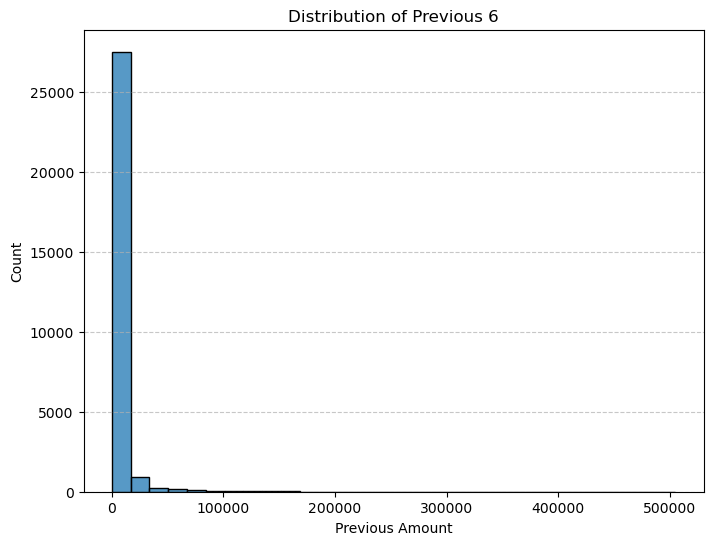

In [290]:
# inpect the data
print("Nullvalues of columns:")
print(df.isnull().sum())
print("Datatypes of columns:")
for column in df.columns:
    print(f"Column '{column}' has data type: {df[column].dtype}")

#rename columns:
df.rename(columns=lambda x: x.strip(), inplace=True)


# Analyze Column ID:
df = df.drop(columns=["ID"])

# Analyze Column Credit:
    #create a plot
plt.figure(figsize=(10, 6))
plt.hist(df['Credit'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Credit Amounts')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
    #check for negative credits
negative_credits = df[df['Credit'] < 0]
if not negative_credits.empty:
    print("Negative values found in the 'Credit' column:")
    print(negative_credits)
else:
    print("No negative values found in the 'Credit' column.")
    #check the top 5 values
top_5_credits = df['Credit'].nlargest(5)
print("The 5 highest values in the 'Credit' column are:")
print(top_5_credits)

# Analyze Column Sex:
    #rename column
df.rename(columns={'Sex': 'Female'}, inplace=True)
    #recode the column
df['Female'] = df['Female'].map({1: 0, 2: 1})
    #create a plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Female', data=df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze Column Education:
    #create a plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='pastel')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    #remove ambiguous values
df = df[~df['Education'].isin([0,4, 5, 6])]
    #create a new plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='pastel')
plt.title('Distribution of new Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze Column Status:
    #rename column
df.rename(columns={'Status': 'Marital Status'}, inplace=True)
    #create a plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=df, palette='pastel')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    #remove ambiguous values
df = df[~df['Marital Status'].isin([0,3])]
    #recode the column
df['Marital Status'] = df['Marital Status'].map({1: 1, 2: 0})
 #create a new plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=df, palette='pastel')
plt.title('Distribution of new Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze Column Age:
    #create a plot
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
    #check for negative credits
negative_ages = df[df['Age'] < 0]
if not negative_ages.empty:
    print("Negative values found in the 'Age' column:")
    print(negative_ages)
else:
    print("No negative values found in the 'Age' column.")
    #check the top 5 values
top_5_ages = df['Age'].nlargest(5)
print("The 5 highest values in the 'Age' column are:")
print(top_5_ages)

# Analyze Columns Repayment:
    # Loop through Repayment 1 to Repayment 6 columns
for i in range(1, 7):
    # Create a figure for each repayment column
    plt.figure(figsize=(8, 6))
    sns.countplot(x=f'Repayment {i}', data=df, palette='pastel')
    plt.title(f'Distribution of Repayment {i}')
    plt.xlabel('Repayment Status')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Analyze Columns Amount:
    # Loop through Amount 1 to Amount 6 columns
for i in range(1, 7):
    # Create a figure for each Amount column
    plt.figure(figsize=(8, 6))
    sns.histplot(df[f'Amount {i}'], bins=30, kde=False, palette='pastel')
    plt.title(f'Distribution of Amount {i}')
    plt.xlabel('Amount')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Analyze Columns Previous:
    # Loop through Previous 1 to Previous 6 columns
for i in range(1, 7):
    # Create a figure for each Previous column
    plt.figure(figsize=(8, 6))
    sns.histplot(df[f'Previous {i}'], bins=30, kde=False, palette='pastel')
    plt.title(f'Distribution of Previous {i}')
    plt.xlabel('Previous Amount')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## 2. Preprocessing

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


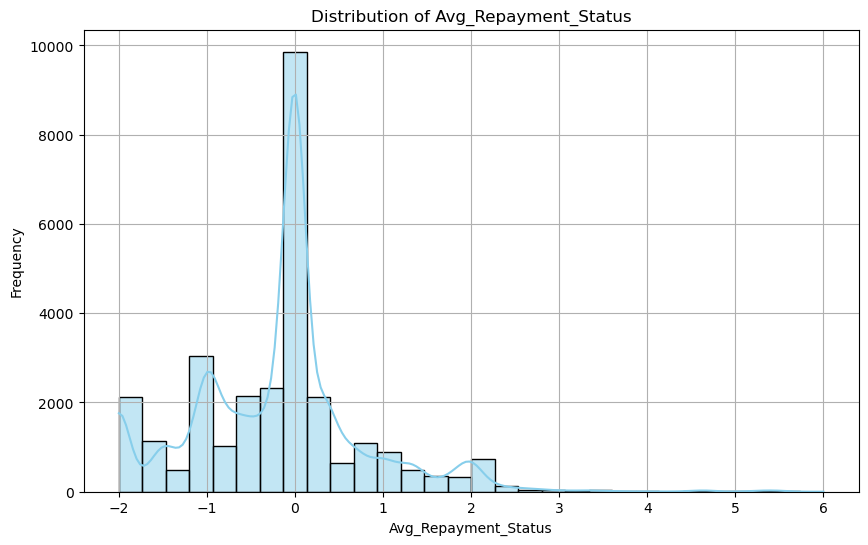

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


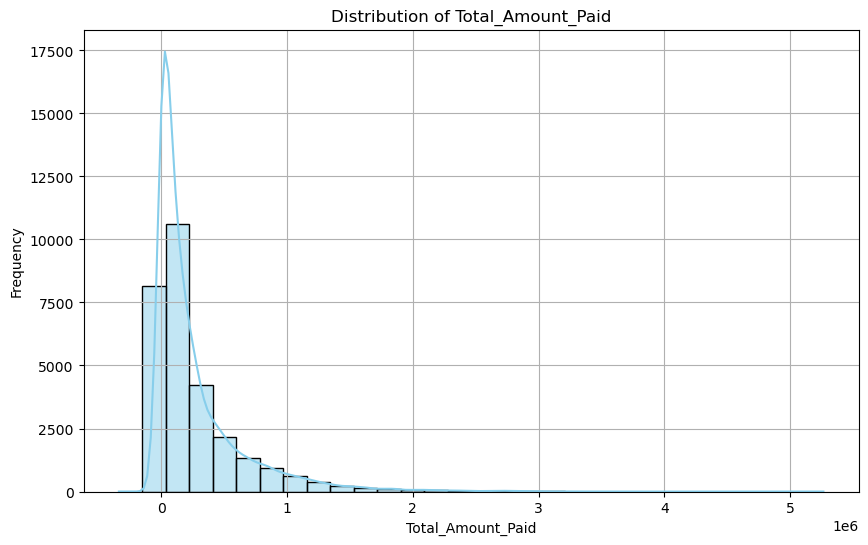

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


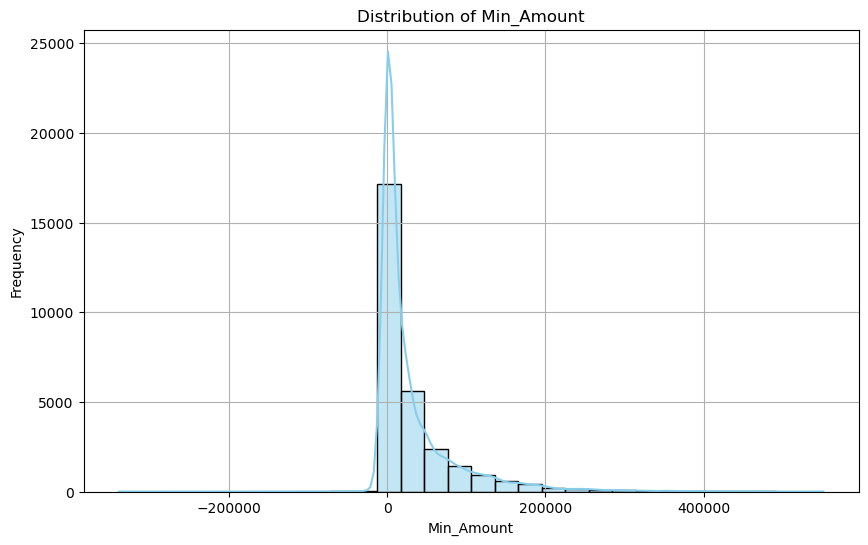

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


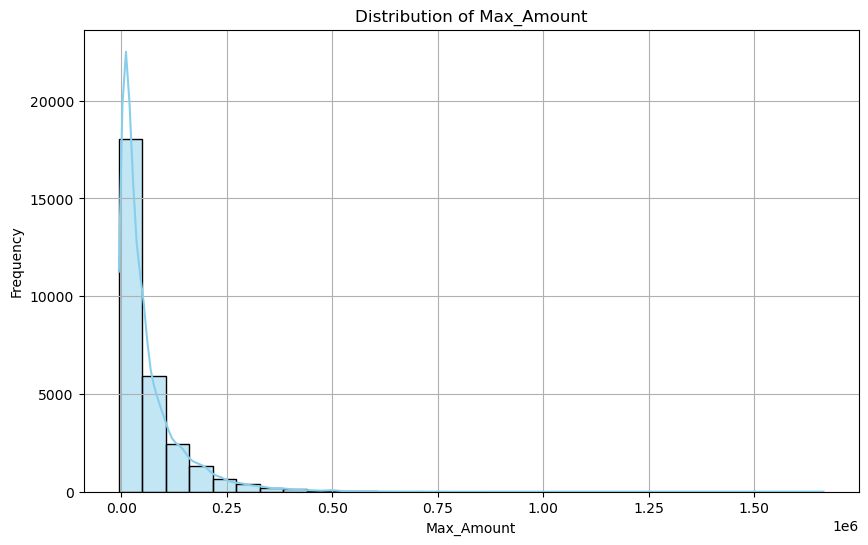

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

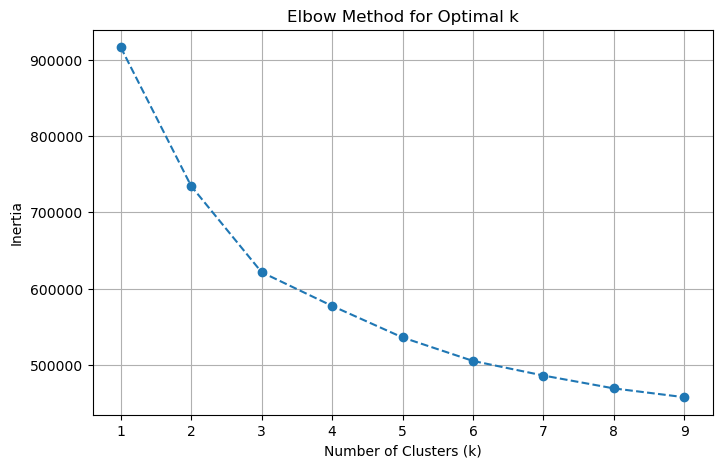

In [291]:
# Average Repayment Status
df['Avg_Repayment_Status'] = df[[f'Repayment {i}' for i in range(1, 7)]].mean(axis=1)

# Standard Deviation of Repayment Status
#df['Std_Repayment_Status'] = df[[f'Repayment {i}' for i in range(1, 7)]].std(axis=1)

# Maximum Repayment Delay
#df['Max_Repayment_Delay'] = df[[f'Repayment {i}' for i in range(1, 7)]].max(axis=1)

# Total Amount Paid
df['Total_Amount_Paid'] = df[[f'Amount {i}' for i in range(1, 7)]].sum(axis=1)

# Minimum and Maximum Amounts
df['Min_Amount'] = df[[f'Amount {i}' for i in range(1, 7)]].min(axis=1)
df['Max_Amount'] = df[[f'Amount {i}' for i in range(1, 7)]].max(axis=1)

# Total Previous Payment
#df['Total_Previous_Payment'] = df[[f'Previous {i}' for i in range(1, 7)]].sum(axis=1)

new_columns = ['Avg_Repayment_Status',
               'Total_Amount_Paid', 'Min_Amount', 'Max_Amount']


# Plot the distribution for each new column
for column in new_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# drop columns
original_columns_to_remove = [f'Repayment {i}' for i in range(1, 7)] + \
                             [f'Amount {i}' for i in range(1, 7)] + \
                             [f'Previous {i}' for i in range(1, 7)]

# Remove the original columns
df.drop(columns=original_columns_to_remove, inplace=True)

df_no_Scaling = df.copy()
# scale columns
columns_to_scale = ['Credit', 'Age','Avg_Repayment_Status',
                    'Total_Amount_Paid', 'Min_Amount', 'Max_Amount']

# Initialize the scaler
#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()
# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


# elbow method
inertia_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()



## 3. Running the Model

Cluster
 0     4472
 7     4176
 1     4080
 8     2940
 3     2633
 2     2370
 10    2030
 4     1813
 9     1690
 11    1048
 6     1015
 5      894
-1        2
Name: count, dtype: int64


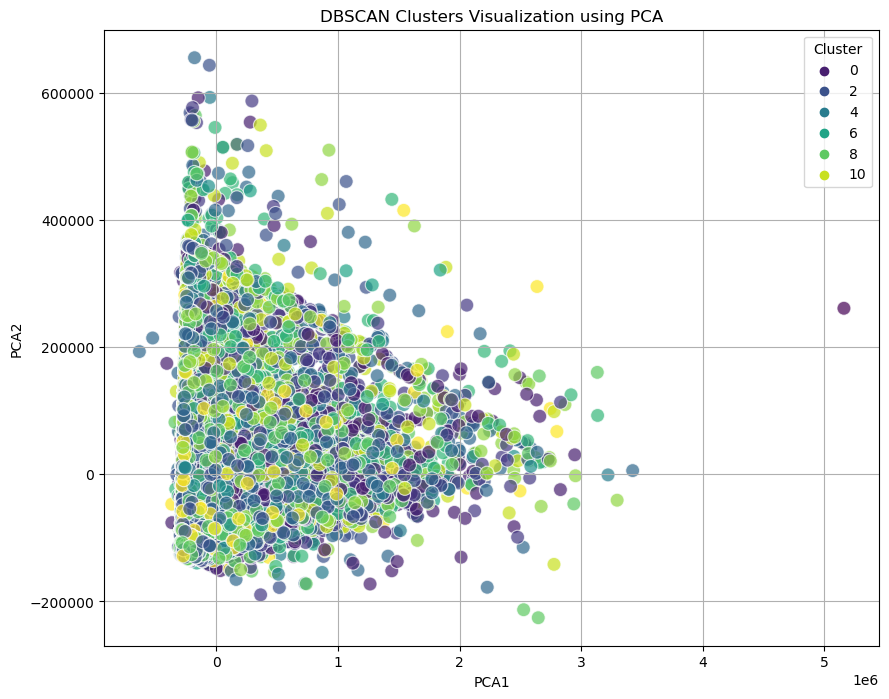

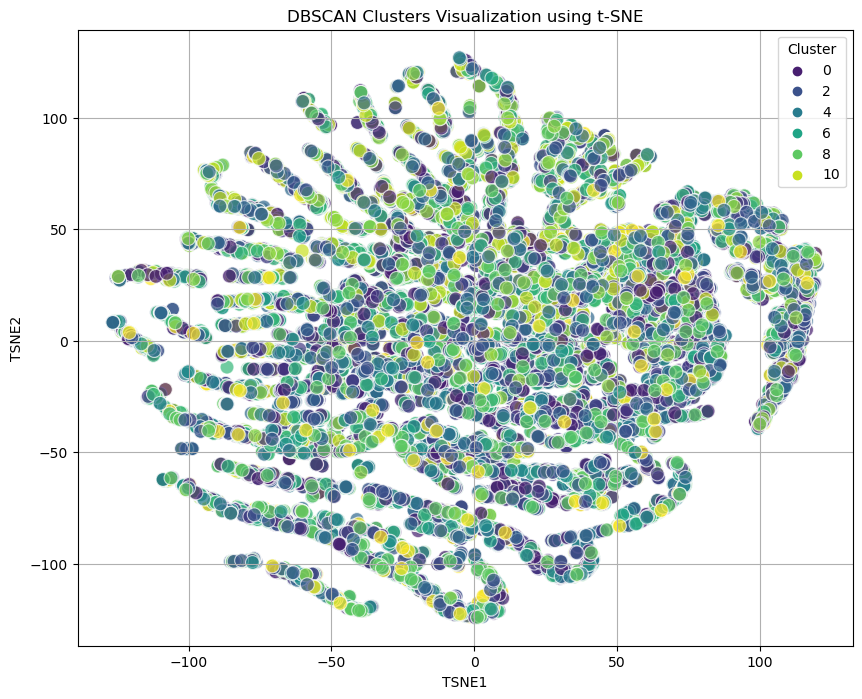

In [292]:
# Define the number of clusters
num_clusters = 4

# Run KMeans
#kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#df['Cluster'] = kmeans.fit_predict(df)
#df_no_Scaling['Cluster'] = df['Cluster']

eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

#for eps in eps_values:
#    for min_samples in min_samples_values:
#        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#        clusters_dbscan = dbscan.fit_predict(df)
#        silhouette_avg_dbscan = silhouette_score(df, clusters_dbscan)
#        print(f'DBSCAN with eps={eps}, min_samples={min_samples} - Silhouette Score: {silhouette_avg_dbscan}')

#Run DB scan
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df)
df['Cluster'] = clusters_dbscan
df_no_Scaling['Cluster'] = clusters_dbscan


# Inspect the cluster assignments
print(df['Cluster'].value_counts())


## Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_no_Scaling)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters_dbscan

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7)
plt.title('DBSCAN Clusters Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Perform t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_no_Scaling)

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = clusters_dbscan

# Plot the clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df_tsne, s=100, alpha=0.7)
plt.title('DBSCAN Clusters Visualization using t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 4. Plotting the Results

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

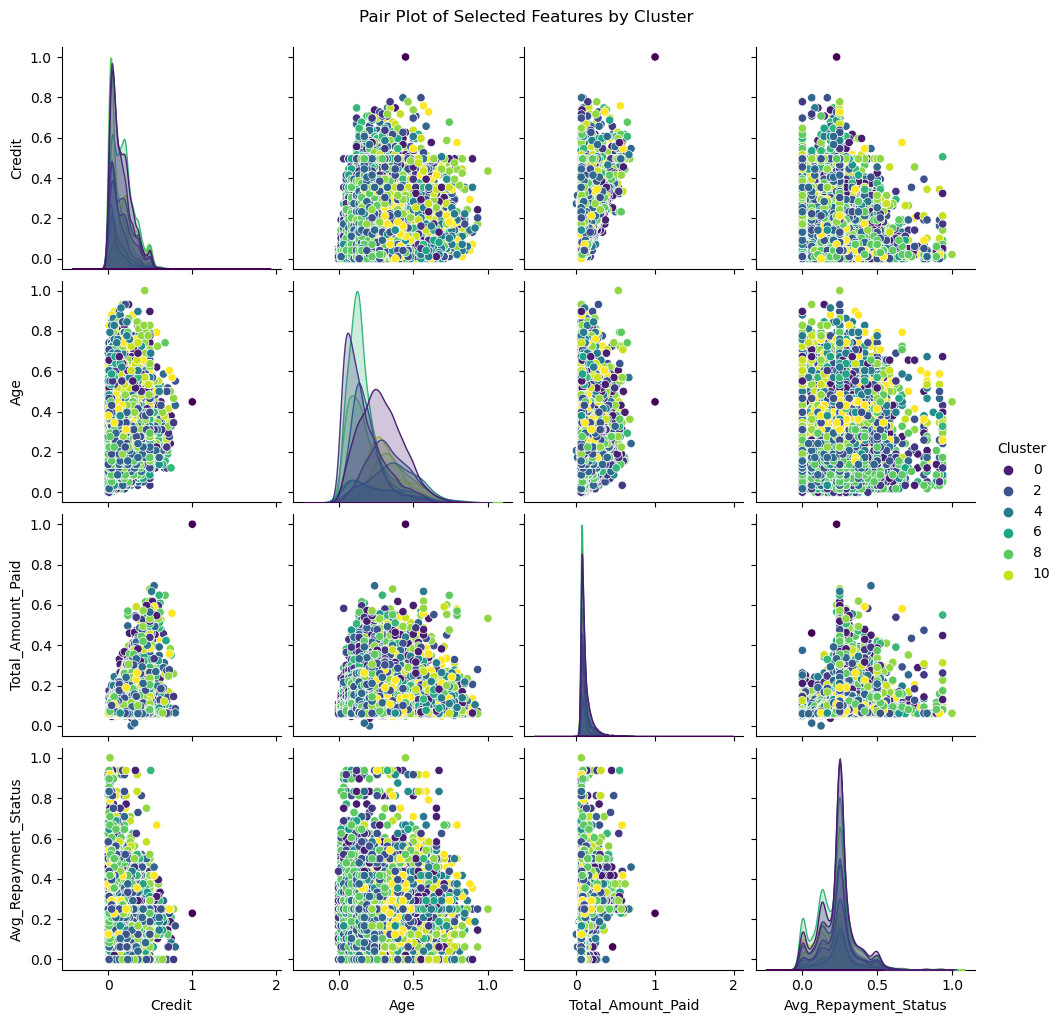

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


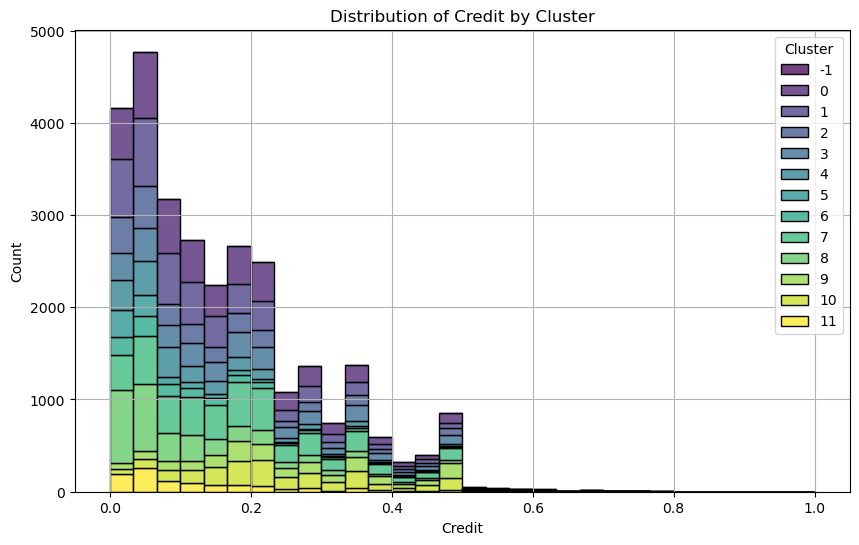

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


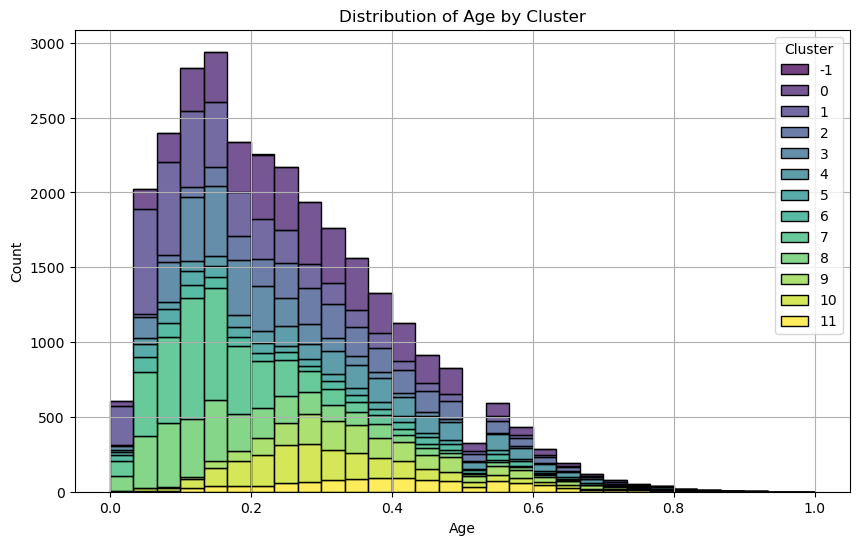

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


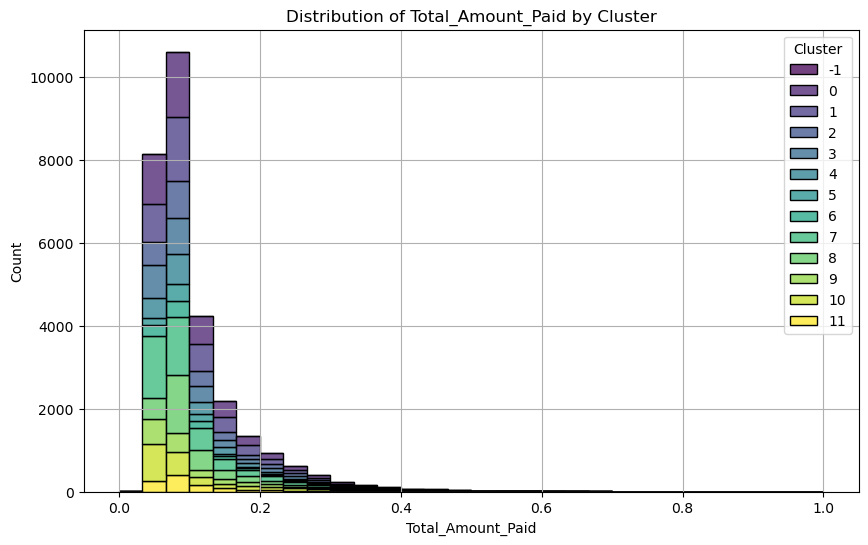

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


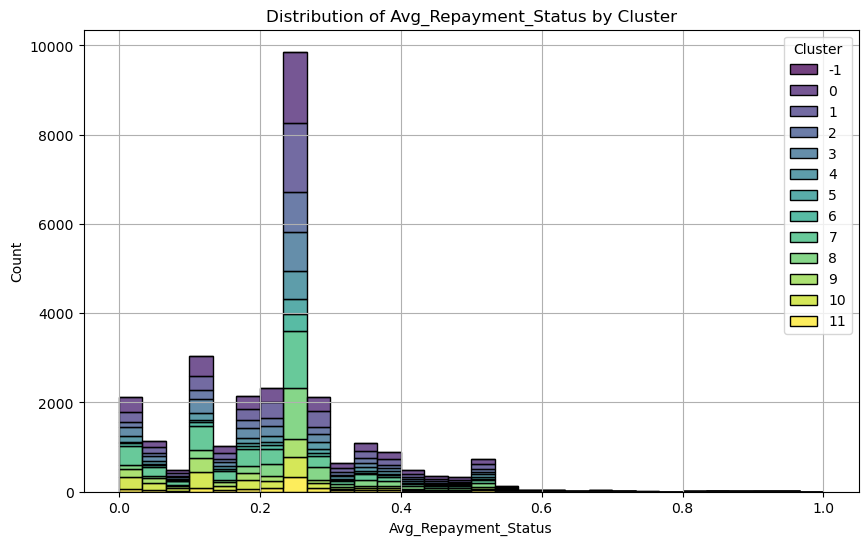

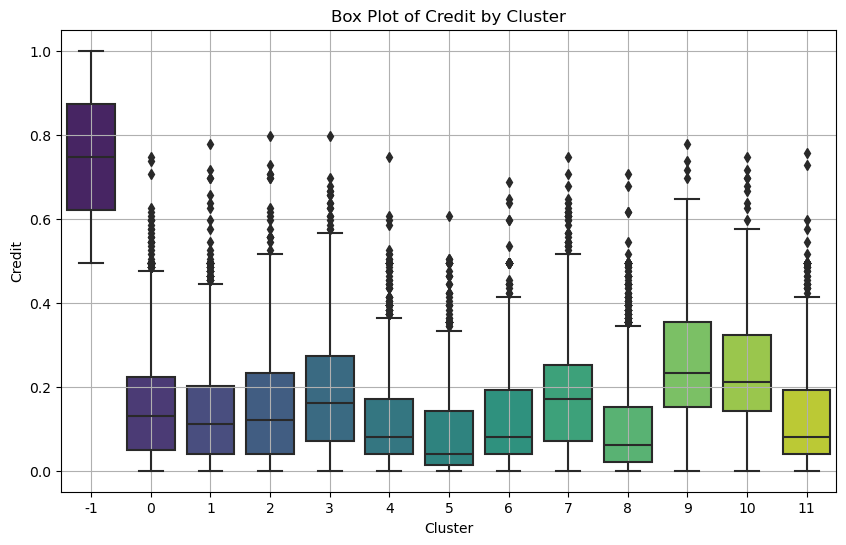

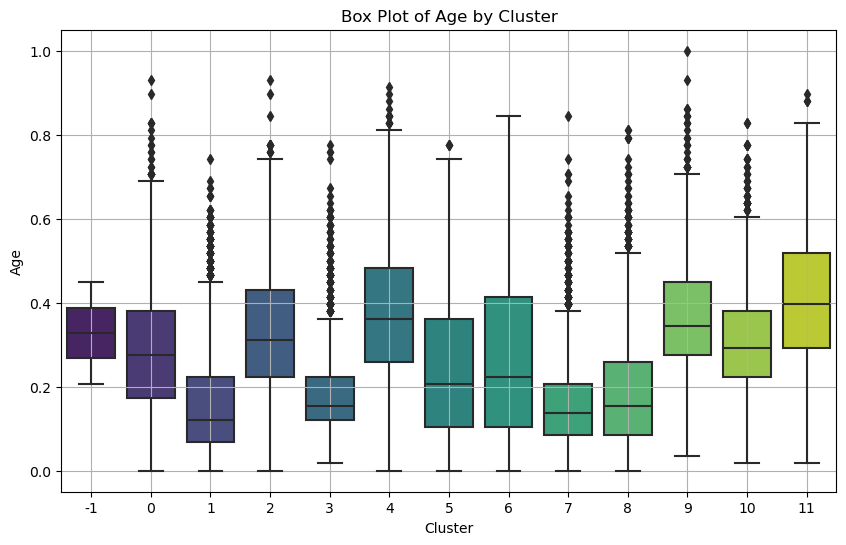

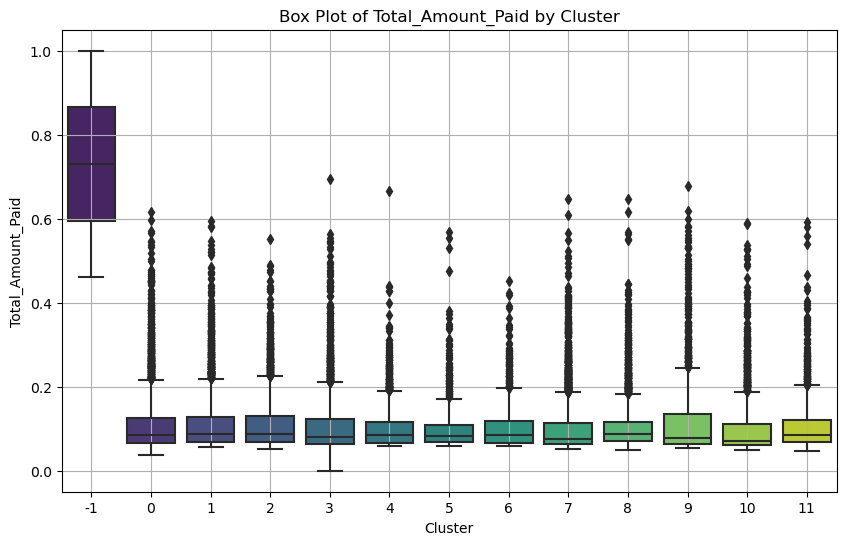

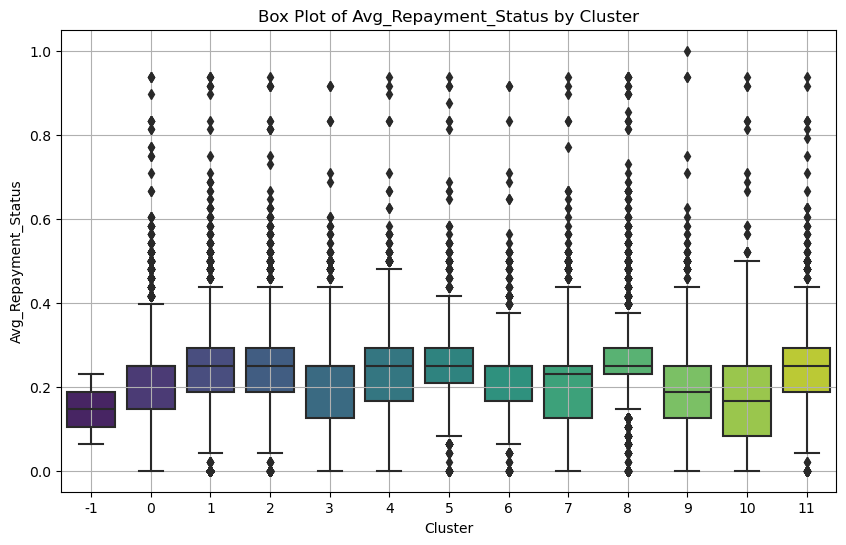

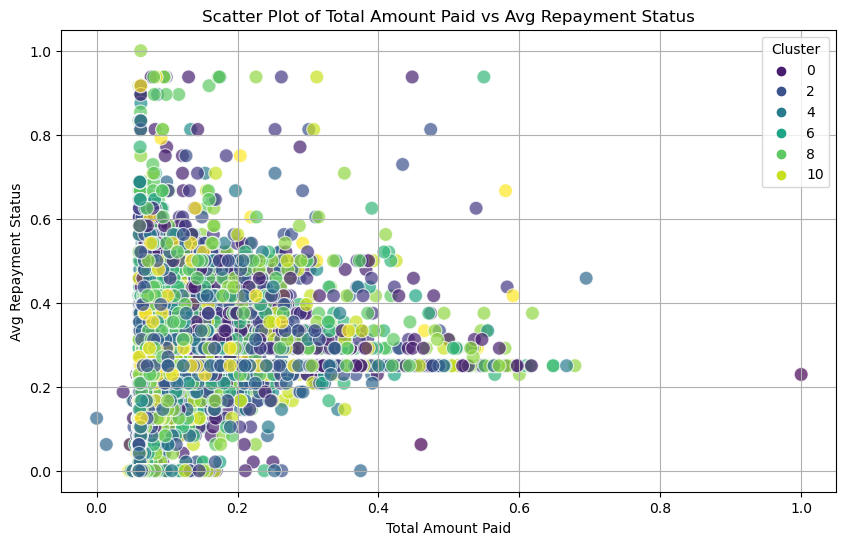

In [293]:
# Pair plot of selected features
selected_features = ['Credit', 'Age', 'Total_Amount_Paid', 'Avg_Repayment_Status']
sns.pairplot(df[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()

# Histograms of key features by cluster
key_features = ['Credit', 'Age', 'Total_Amount_Paid', 'Avg_Repayment_Status']

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Cluster', multiple='stack', palette='viridis', bins=30)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Box plots of key features by cluster
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

# Scatter plot of two important features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Amount_Paid', y='Avg_Repayment_Status', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Scatter Plot of Total Amount Paid vs Avg Repayment Status')
plt.xlabel('Total Amount Paid')
plt.ylabel('Avg Repayment Status')
plt.grid(True)
plt.show()


## 4.1 Plotting unscaled

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

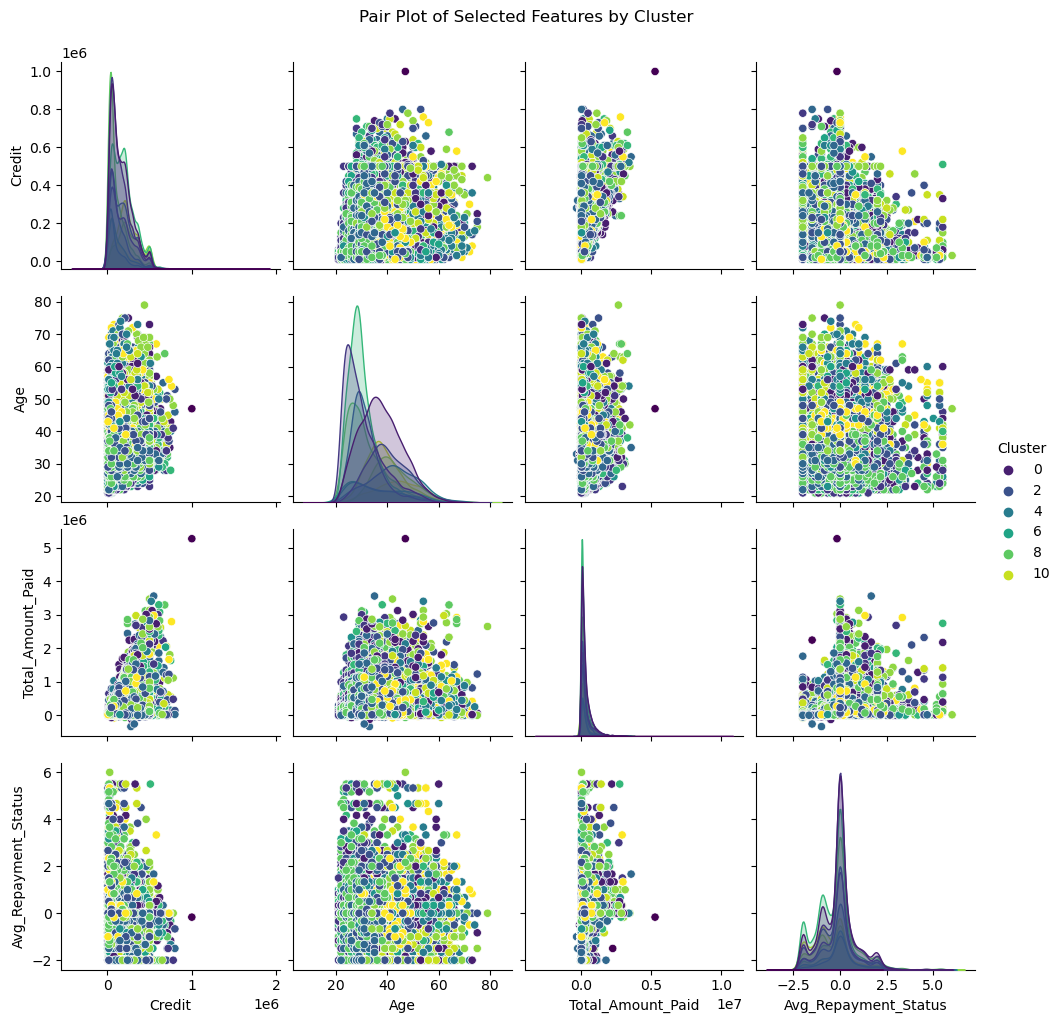

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


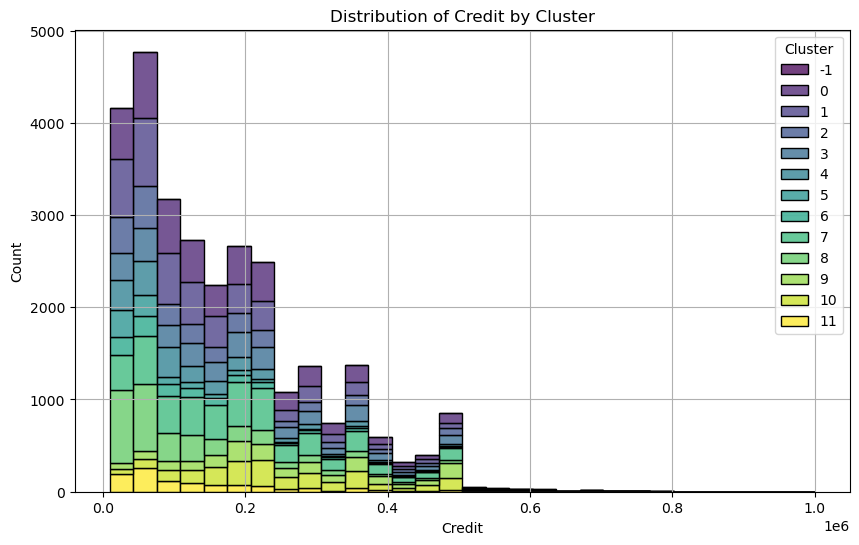

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


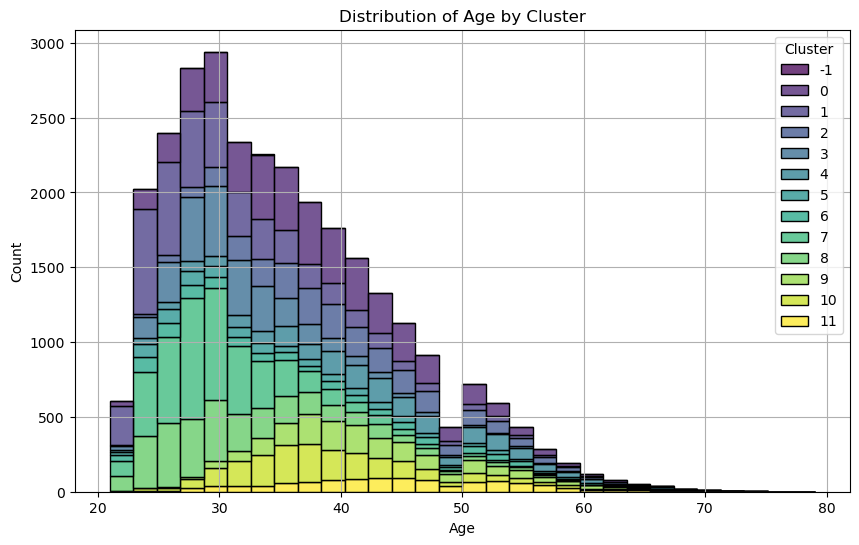

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


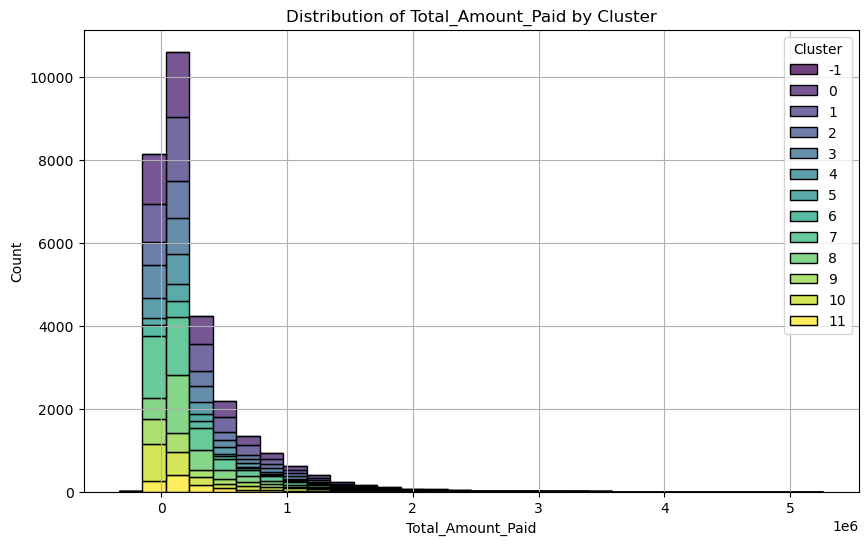

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


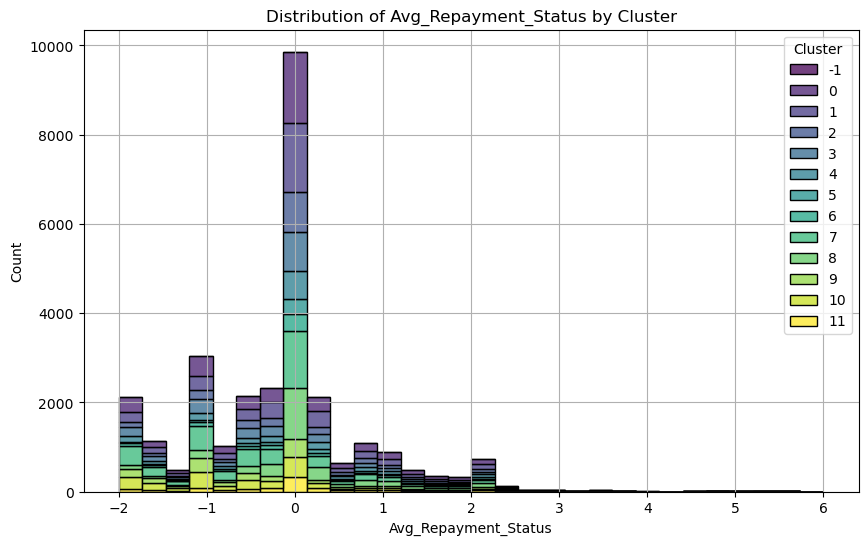

In [294]:
# Pair plot of selected features
selected_features = ['Credit', 'Age', 'Total_Amount_Paid', 'Avg_Repayment_Status']
sns.pairplot(df_no_Scaling[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()

# Histograms of key features by cluster
key_features = ['Credit', 'Age', 'Total_Amount_Paid', 'Avg_Repayment_Status']

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_no_Scaling, x=feature, hue='Cluster', multiple='stack', palette='viridis', bins=30)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

## 5. Model Diagnostics

In [295]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df[df.columns], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8090202212203189


In [296]:
# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 457613.4343061617


In [297]:
# Running KMeans multiple times to check stability
inertia_values = []
silhouette_scores = []

for i in range(1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=i)
    clusters = kmeans.fit_predict(df[columns_to_scale])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[columns_to_scale], clusters))

print(f'Inertia values across different runs: {inertia_values}')
print(f'Silhouette scores across different runs: {silhouette_scores}')

cluster_summary = df_no_Scaling.groupby('Cluster').describe()
print(cluster_summary)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia values across different runs: [943.0185399233633]
Silhouette scores across different runs: [0.3082012554229929]
         Credit                                                              \
          count           mean            std       min       25%       50%   
Cluster                                                                       
-1          2.0  750000.000000  353553.390593  500000.0  625000.0  750000.0   
 0       4472.0  164180.679785  121612.749859   10000.0   60000.0  140000.0   
 1       4080.0  146840.686275  115957.673384   10000.0   50000.0  120000.0   
 2       2370.0  162101.265823  132974.122373   10000.0   50000.0  130000.0   
 3       2633.0  192085.074060  137679.494536   10000.0   80000.0  170000.0   
 4       1813.0  129387.755102  108136.483767   10000.0   50000.0   90000.0   
 5        894.0  100847.516779  105496.724266   10000.0   22500.0   50000.0   
 6       1015.0  135674.876847  118432.033910   10000.0   50000.0   90000.0   
 7       41